# **Heart Attack Analysis of Classification**

# 1. Project Introduction

## 1.1 Introduction

The ischaemic heart disease is the biggest killer in the world, which occupies 16% of the world’s total deaths. The largest increase can be observed from 2019 to 2020, rising by 2 million cases to 8.9 million deaths (WTO, 2020). Everybody knows that a heart attack is a frightening experience, and this kind of attack will happen when the flow of blood to the heart is blocked. A heart attack is also called myocardial infarction which is a fatal disease (Mayo Clinic, 2020). 

Even though a heart attack occurs suddenly, the patients usually have some warning signs. For instance, patients will feel comfortable with their chest (chest pain or angina). Or the individuals will feel shortness of breath. Or the beating of the heart is quite fast before the patients get a heart attack (AHA, 2016).

In this project, I will work on the data set of heart attack information and try to predict whether a person is prone to a heart attack or not by different models.

## 1.2 Aim

This paper will be split into three major parts. 

Firstly, I will perform the Exploratory Data Analysis. All the variable data will be assigned into three groups, which are categorical columns, continuous columns and the target variable. As for different types of variable, I will apply suitable graphs to represent the data. And then I try to show the relationship between the target variable and the other 13 features.

Secondly, I apply the 5 kinds of the classifier to construct the models which are used to predict if a person is prone to a heart attack or not. The discussion of the classifier with the best performance in classification will be present in the last paragraph.

Last but not the least, visualizations are the necessary tool to observe relationships amount variables intuitively.

# 2. Data Prepration

## 2.1 Read and import the data

Data source: This dataset comes from Kaggle which is the platform to provide some useful dataset and also a high quantity of coding works. The columns of this ‘Heart Attack Analysis and Prediction Dataset’ are describing the physical statues of the human being.

In [17]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
df= pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## 2.2 Check the information of dataset 

In [18]:
#Checking For datatypes of the attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


According to the about result, we can check the datatype of those variables. And we should check whether the dataset has the NaN value.

In [19]:
#Checking for null values
df.isnull().any()

age         False
sex         False
cp          False
trtbps      False
chol        False
fbs         False
restecg     False
thalachh    False
exng        False
oldpeak     False
slp         False
caa         False
thall       False
output      False
dtype: bool

In [20]:
print("The shape of the dataset is : ", df.shape)

The shape of the dataset is :  (303, 14)


There are no NaN values in this dataset, and we know the shape of the dataset.

## 2.3 Data dictionary

**age**: Age of the patient

**sex**: Sex of the patient (0 = female, 1 male)

**cp**: Chest pain type, 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

**trtbps**: Resting blood pressure (in mm Hg)

**chol**: Cholestoral in mg/dl fetched via BMI sensor

**fbs**: Fasting blood sugar > 120 mg/dl (1 = True, 0 = False)

**restecg**: Resting electrocardiographic results (0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy)

**thalachh**: Maximum heart rate achieved

**exng**: exercise induced angina (1 = yes; 0 = no)

**oldpeak**: Previous peak

**slp**: Slope

**caa**: Number of major vessels (0-4)

**thall**: Thalium Stress Test result (0,3)

**output**: Target variable (0= less chance of heart attack 1= more chance of heart attack)

## 2.4 Focus on target variable

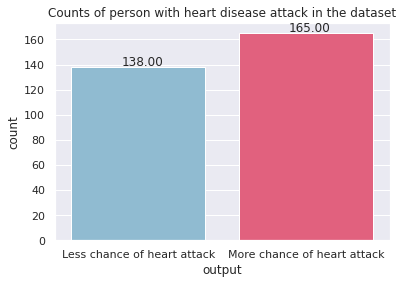

In [21]:
import seaborn as sns
ax = sns.countplot(data=df, x='output',palette=['#85bfdc','#f64c72']) 
ax.set(xticklabels=['Less chance of heart attack', 'More chance of heart attack'],title="Counts of person with heart disease attack in the dataset")
ax.tick_params(bottom=False)
for p in ax.patches:
    ax.annotate('{:.2f}'.format(p.get_height()), (p.get_x()+0.3, p.get_height()+1)) # Placing the count number on the top of the bars

As 54% of the person have heart attack so data is almost balanced so no need to balance the data.

## 2.5 Grouping the other variables

There are 13 variables and 1 variable of output, however, we should split those 13 variables into different types which is the necessary step to process the analysis of this paper.

In [22]:
categorical_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous_cols = ['age','trtbps','chol','thalachh','oldpeak']
target_col = ["output"]
print("The categorical cols are : ", categorical_cols)
print("The continuous cols are : ", continuous_cols)
print("The target variable is :  ", target_col)

The categorical cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


# 3. Exploratory Data Analysis

## 3.1 Count plot of categorical features

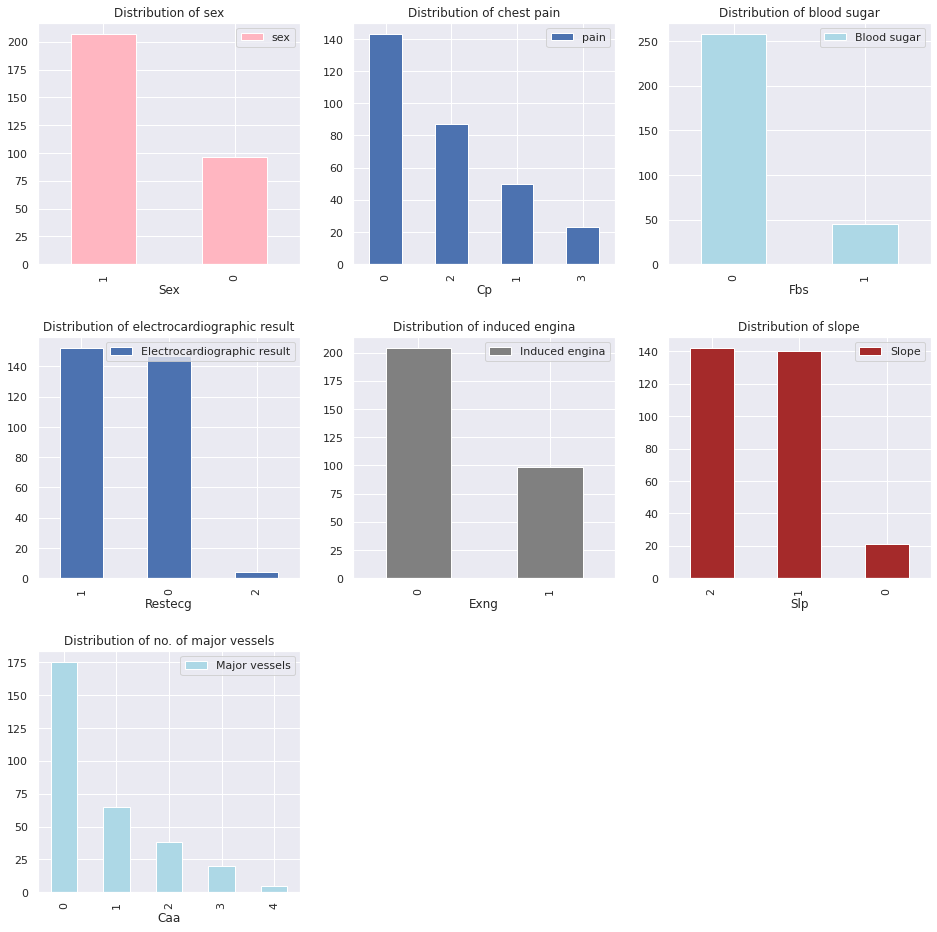

In [23]:
sns.set_theme(style="darkgrid")
fig=plt.figure(figsize=(16, 16))
plt.subplots_adjust( hspace =0.3)
fig = plt.subplot(331)
df['sex'].value_counts().plot(kind='bar',label='sex',color='lightpink')
plt.xlabel("Sex", labelpad=3)
plt.title ('Distribution of sex')
plt.legend()
fig = plt.subplot(332)
df['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('Cp', labelpad=3)
plt.title ('Distribution of chest pain')
plt.legend()
fig = plt.subplot(333)
df['fbs'].value_counts().plot(kind='bar',label='Blood sugar', color="lightblue")
plt.xlabel('Fbs', labelpad=3)
plt.title ('Distribution of blood sugar')
plt.legend()
fig = plt.subplot(334)
df['restecg'].value_counts().plot(kind='bar',label='Electrocardiographic result')
plt.xlabel('Restecg', labelpad=3)
plt.title ('Distribution of electrocardiographic result')
plt.legend()
fig = plt.subplot(335)
df['exng'].value_counts().plot(kind='bar',label='Induced engina', color="grey")
plt.xlabel('Exng', labelpad=3)
plt.title ('Distribution of induced engina')
plt.legend()
fig = plt.subplot(336)
df['slp'].value_counts().plot(kind='bar',label='Slope', color="brown")
plt.xlabel('Slp', labelpad=3)
plt.title ('Distribution of slope')
plt.legend()
fig = plt.subplot(337)
df['caa'].value_counts().plot(kind='bar',label='Major vessels',color="lightblue")
plt.xlabel('Caa', labelpad=3)
plt.title ('Distribution of no. of major vessels')
plt.legend()
plt.show()

## 3.2 Relationship between the categorical varibles and target variable

In [24]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


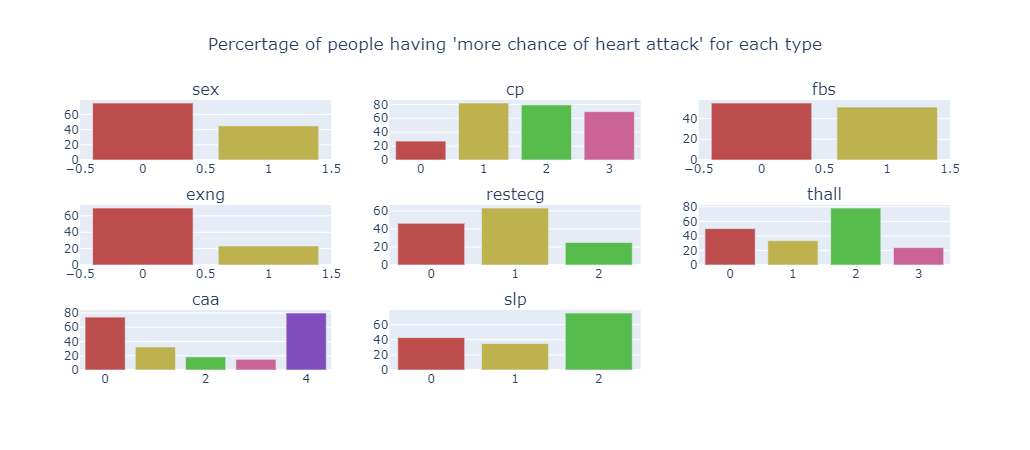

In [25]:
import plotly.graph_objs as go
from plotly import tools
from plotly.subplots import make_subplots

categorical_cols = ['sex','cp','fbs','exng','restecg','thall','caa','slp']

rows = 3
cols = 3

subplot_titles = [l for l in categorical_cols]

# Applying the bar charts to all categorical variables
specs=[[{"type": "bar"},{"type": "bar"},{"type": "bar"}],
       [{"type": "bar"},{"type": "bar"},{"type": "bar"}],
       [{"type": "bar"},{"type": "bar"},None]]


fig = make_subplots(
        rows=rows,
        cols=cols,
        subplot_titles=subplot_titles,
        specs=specs,  
        print_grid=False
)


for i, b in enumerate(categorical_cols):
    row = i // cols + 1
    col = (i % rows) + 1
    name = categorical_cols[i]
    l = [(100)*df[df[name]==x]['output'].sum()/len(df[df[name]==x]['output']) 
         for x in range(len(df[name].value_counts().tolist()))]
    fig.add_trace(go.Bar(
    x = [x for x in range(len(df[name].value_counts().tolist()))],
    y = l,
    marker_color=['#bd4d4d','#bdb24d','#56bd4d','#cc6397','#814dbd'],
    ),row=row,col=col)

fig.update_layout(autosize = True,
                  title="Percertage of people having 'more chance of heart attack' for each type", 
                  title_x=0.5,
                 showlegend=False)
fig.show()

The above table is showing the relationship between the different categories and patients who have more chances of a heart attack.
1. 0 of sex have more number of individuals than 1 of sex which means females have more probability to have a heart attack than males.
2. Patients who have higher levels of chest pain will have more chance of heart attack.
3. Someone doing exercise with angina indicates that patients should have more attention to a heart attack.
4. Numbers of major vessels are 0 and 4 will have more potential risk of a heart attack.

## 3.3 Density plot of continuous features

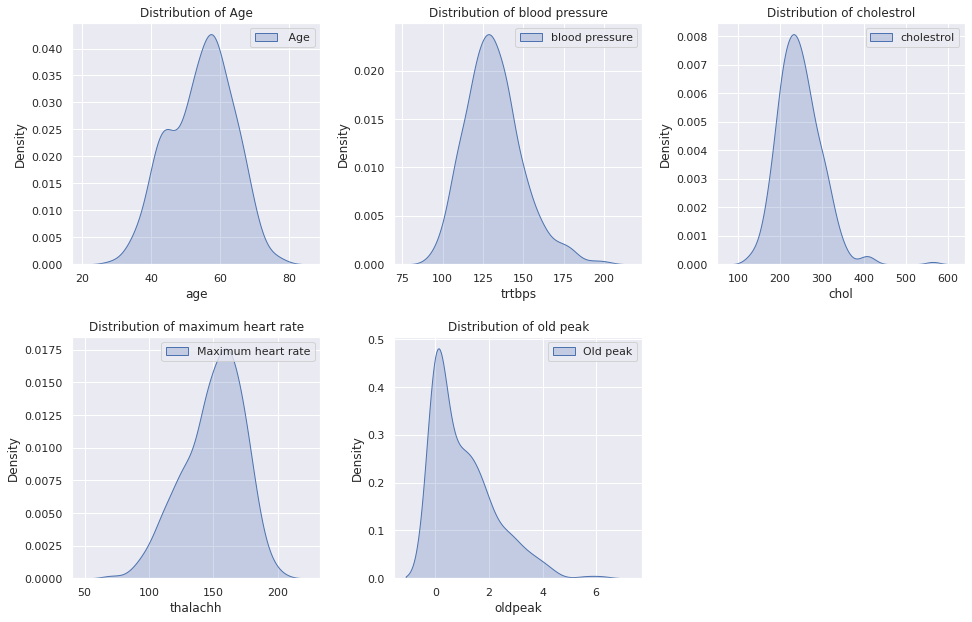

In [26]:
# Applying the density plots to all continuous variables
fig=plt.figure(figsize=(16, 16))
plt.subplots_adjust(wspace =0.3, hspace =0.3)
fig = plt.subplot(331)
sns.kdeplot(df['age'],shade=True,label=' Age')
plt.title ('Distribution of Age')
plt.legend()
fig = plt.subplot(332)
sns.kdeplot(df['trtbps'],shade=True,label='blood pressure')
plt.title ('Distribution of blood pressure')
plt.legend()
fig = plt.subplot(333)
sns.kdeplot(df['chol'],shade=True,label='cholestrol')
plt.title ('Distribution of cholestrol')
plt.legend()
fig = plt.subplot(334)
sns.kdeplot(df['thalachh'],shade=True,label='Maximum heart rate')
plt.title ('Distribution of maximum heart rate')
plt.legend()
fig = plt.subplot(335)
sns.kdeplot(df['oldpeak'],shade=True,label='Old peak')
plt.xlabel('oldpeak')
plt.title ('Distribution of old peak')
plt.legend()
plt.show()

## 3.4 Correlation matrix of continuous varibles and target variable

In [27]:
# Dropping the all categorical variables
contis = df.drop(['sex','cp','fbs','exng','restecg','exng','thall','caa','slp'], axis=1)
correlation_matrix=contis.corr()
correlation_matrix

,age,trtbps,chol,thalachh,oldpeak,output
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
output,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


And also we can apply the heatmap of the correlation matrix to observe the relationship.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'age'),
  Text(0, 1.5, 'trtbps'),
  Text(0, 2.5, 'chol'),
  Text(0, 3.5, 'thalachh'),
  Text(0, 4.5, 'oldpeak'),
  Text(0, 5.5, 'output')])

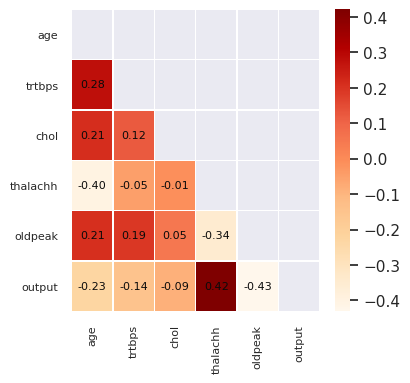

In [28]:
plt.figure(figsize=(4, 4),dpi=100)
sns.heatmap(data=correlation_matrix,
            cmap='OrRd',
            annot=True,
            fmt=".2f",
            linewidths=.1,
            annot_kws={'size':8,'weight':'normal', 'color':'#0a0a0a'},
            mask=np.triu(np.ones_like(correlation_matrix,dtype=np.bool))
           )
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

Every figure in this heatmap is showing the score of the two variables. Because we focus on the output in this paper, we can check the last row of the matrix to find which variable has a higher correlation. The scatterplot heatmap matrix suggests that there might be some correlation between output and oldpeak (-0.43, negative relationship), output and thalachh (0.42, positively).

# 4. Prediction of different classification models

The next stage in data processing is splitting the dataset into training and testing groups, and we will use the training set to create the classifier. As for testing data, it used to test the accuracy of the classification. Usually, we will split the data set into training and testing dataset by 75% and 25%.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X = df.drop('output', axis = 1)
y = df.output
X = StandardScaler().fit(X).transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=10)

We can use the "len()" to check whether the training and testing dataset has been split in the right size.

In [30]:
len(X_train),len(X_test),len(y_train),len(y_test)

(227, 76, 227, 76)

## 4.1 Logistic Regression

Logistic regression is one of the groups of linear classifiers and is a basic classification technique. A binary logistic model has two possible values of result, which is represented by an indicator variable, where the two values are "0" and "1". In this dataset, we can treat the two results of "more chance of heart attack" and "less chance of heart attack" as the indicator variables of "1" and "0".

In [31]:
from sklearn.linear_model import LogisticRegression
Logi = LogisticRegression()
Logi.fit(X_train,y_train)

LogisticRegression()

In [32]:
a_train = Logi.score(X_train,y_train)
print('Coef of determination:',a_train)

Coef of determination: 0.8634361233480177


In the training dataset, a high score of 0.86 could be found by using the classifier of Logistic Regression.

In [33]:
pred = Logi.predict(X_test)
a_test = Logi.score(X_test,y_test)
a_test

0.7631578947368421

We use the classifier of Logistic Regression to test the accuracy of the testing dataset which belongs to the same original dataset. And we can find the result score of 0.76 which means 76% of testing data have been classified to correct result.

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.68      0.76        41
           1       0.70      0.86      0.77        35

    accuracy                           0.76        76
   macro avg       0.77      0.77      0.76        76
weighted avg       0.78      0.76      0.76        76



Also, there are some other measures to provide the quality of the classifier. We can use the "classification_report()" to get many of the most important measures, such as precision, recall and F1 which are metrics to check how well a classifier does in predicting each group relative to how often it is correct.

## 4.2 K-Nearest Neighbour

In the k-Nearest Neighbour classification, the result is a class membership. For example, an object is classified by a plurality vote if its neighbours, which means this object will be assigned in the class most common among its k nearest neighbours. And an important parameter of the measure of kNN is the specification of how many neighbours to think about while making the classification.

In [35]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
b_train = kNN.score(X_train,y_train)
print('coef of determination:',b_train)

coef of determination: 0.8722466960352423


In [37]:
pred = kNN.predict(X_test)
b_test = kNN.score(X_test,y_test)
b_test

0.8026315789473685

In [38]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.75      0.86      0.80        35

    accuracy                           0.80        76
   macro avg       0.81      0.81      0.80        76
weighted avg       0.81      0.80      0.80        76



## 4.3 Gaussian Naive Bayes

Gaussian Naive Bayes is also a simple measure for constructing classifiers. The model will assign the problem instances by class labels
For example, a fruit may be considered to be an apple if it is red, round, and about 10 cm in diameter. Even Gaussian Naive Bayes has oversimplified assumptions, it can do quite well in many complex real-world situations. Also, Gaussian Naive Bayes only requires a small number of the training dataset to do classification.

In [39]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

In [40]:
c_train = GNB.score(X_train,y_train)
c_train

0.8502202643171806

In [41]:
pred = GNB.predict(X_test)
c_test = GNB.score(X_test,y_test)
c_test

0.7894736842105263

In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.74      0.83      0.78        35

    accuracy                           0.79        76
   macro avg       0.79      0.79      0.79        76
weighted avg       0.79      0.79      0.79        76



## 4.4 Decision Tree

Another method is the Decision Tree which is quite easy to implement. There are not require parameters in the Decision Tree. And the goal of the Decision Tree is to create a model that classifies the value of a target variable by learning simple decision rules.

In [43]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [44]:
d_train = DT.score(X_train,y_train)
d_train

1.0

In [45]:
pred = DT.predict(X_test)
d_test = DT.score(X_test,y_test)
d_test

0.7105263157894737

In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.79      0.63      0.70        41
           1       0.65      0.80      0.72        35

    accuracy                           0.71        76
   macro avg       0.72      0.72      0.71        76
weighted avg       0.72      0.71      0.71        76



## 4.5 Random Forest

Random Forest is not the same as Decision Tree, which measures need to specify the parameter called n_estimators. And the different parameters were determined how many trees should be created in the construction of the whole forest. 

In [47]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train,y_train)

RandomForestClassifier()

In [48]:
e_train = RFC.score(X_train,y_train)
e_train

1.0

In [49]:
pred = RFC.predict(X_test)
e_test = RFC.score(X_test,y_test)
e_test

0.7763157894736842

In [50]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.71      0.77        41
           1       0.71      0.86      0.78        35

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.79      0.78      0.78        76



We can also alter the hyperparameters to control the learning process. For instance, we can assign the different values of n_estimators to check which hyperparameter is the best choice. Without specifying n_estimators, the number of trees is set as 100, however, we can use the grid search and 5-fold cross-validation to find the best hyperparameter.

In [51]:
cv_fold=5 # Using the 5-fold cross-validation

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

clf = RandomForestClassifier(n_estimators=10)

# call the cross_val_score function
scores = cross_val_score(clf, X_test,y_test, cv=cv_fold)
# note that this is an array
print(scores) 
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

[0.875      0.73333333 0.73333333 0.66666667 0.53333333]
Accuracy: 0.71 (+/- 0.11)


In [52]:
from sklearn import model_selection

# values of n_estimators
parameters = {'n_estimators':[50, 100, 200, 300, 400]}
rf = RandomForestClassifier()

clf = model_selection.GridSearchCV(rf, parameters)

clf.fit(X_test,y_test)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [50, 100, 200, 300, 400]})

In [53]:
print ("The best parameter value is: ")
print (clf.best_params_)
print ("The best score is: ")
print (clf.best_score_)

The best parameter value is: 
{'n_estimators': 100}
The best score is: 
0.7875


According to the calculation by computer, It says that the best choice of n_estimators is 200, with the best score of classification is around 0.7742.

## 4.6 Summary of different classifiers

In [54]:
data={"Classifier":['LR','KNN','GNB','DT','RFC'],"Train Accuracy":[a_train,b_train,c_train,d_train,e_train],"Test Accuracy":[a_test,b_test,c_test,d_test,e_test]}
table=pd.DataFrame(data,index=[1,2,3,4,5])
table

,Classifier,Train Accuracy,Test Accuracy
1,LR,0.863436,0.763158
2,KNN,0.872247,0.802632
3,GNB,0.850220,0.789474
4,DT,1.000000,0.710526
5,RFC,1.000000,0.776316


Checking the result of about table, the highest test accuracy is 0.8026 which is using the classifier of kNN measure. Now we focus on the classification_report of the k-Nearest Neighbour with k equals 3.

In [55]:
from sklearn.neighbors import KNeighborsClassifier
kNN = KNeighborsClassifier(n_neighbors=3)
kNN.fit(X_train,y_train)
r_sq3 = kNN.score(X_train,y_train)
pred = kNN.predict(X_test)
kNN.score(X_test,y_test)

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81        41
           1       0.75      0.86      0.80        35

    accuracy                           0.80        76
   macro avg       0.81      0.81      0.80        76
weighted avg       0.81      0.80      0.80        76



We can talk more details about the result of kNN classification.

1. Accuracy score = 0.80: There are about 80% of individuals are correctly classified regardless of their actual class. 

2. Recall score = 0.86: In the group of patients with more chance of heart attack, there are about 86% of individuals have been classified correctly.

3. Precision score = 0.75: In the group of individuals who are considered as patients with a high probability of gaining heart attack, there are about 3/4 of individuals who are really the patients with more chance of heart attack.

# 5. Visualization of the Dataset

Before using the different methods for visualization of the dataset, we should deal with the outliers.

In [56]:
df.shape, df.columns

((303, 14),
 Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
        'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
       dtype='object'))

In [57]:
df = df[df.chol<380]
df = df[df.trtbps<190]
df = df[df.thalachh>75]

In [58]:
df.shape

(295, 14)

In [59]:
correlation_matrix

,age,trtbps,chol,thalachh,oldpeak,output
age,1.000000,0.279351,0.213678,-0.398522,0.210013,-0.225439
trtbps,0.279351,1.000000,0.123174,-0.046698,0.193216,-0.144931
chol,0.213678,0.123174,1.000000,-0.009940,0.053952,-0.085239
thalachh,-0.398522,-0.046698,-0.009940,1.000000,-0.344187,0.421741
oldpeak,0.210013,0.193216,0.053952,-0.344187,1.000000,-0.430696
output,-0.225439,-0.144931,-0.085239,0.421741,-0.430696,1.000000


In totally, we have 13 variables and 1 output feature. However, as for 2D visualization, we can only explore the relationship between two the most important variable and output. And the categorical variables are not suitable for visualization, so we choose the key features on continuous cols. I arrange the continuous cols by correlation scores from the higher to lower.

In [60]:
import pandas as pd
cols=['oldpeak','thalachh','age','trtbps','chol']
X_pd = pd.DataFrame(data=df,columns=cols)

In [61]:
X_pd.head()

,oldpeak,thalachh,age,trtbps,chol
0,2.3,150,63,145,233
1,3.5,187,37,130,250
2,1.4,172,41,130,204
3,0.8,178,56,120,236
4,0.6,163,57,120,354


In [62]:
df[cols].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
oldpeak,295.0,1.018644,1.147679,0.0,0.0,0.6,1.6,6.2
thalachh,295.0,149.715254,22.564200,88.0,133.5,152.0,166.5,202.0
age,295.0,54.179661,9.096886,29.0,47.0,55.0,60.5,77.0
trtbps,295.0,131.155932,16.863884,94.0,120.0,130.0,140.0,180.0
chol,295.0,242.776271,45.186057,126.0,210.5,240.0,272.0,360.0


In [63]:
y_pd= pd.Series(df["output"]) # "Output" should be independent of the other variables

In [64]:
X_pd['y_pd']=y_pd
X_pd_all= X_pd

In [65]:
# Creating the column of "Description" to map the column of "y_pd"
X_pd_all['Description'] = X_pd_all['y_pd'].map(lambda a : 'less chance' if a == 0  else 'more chance')

In [66]:
# Checking the count number of "more chance of heart attack"
count=X_pd_all['Description'].value_counts()
n_more_chance = count['more chance']
print("n_more_chance = {0}".format(n_more_chance))

n_more_chance = 162


In [67]:
# Checking the count number of "less chance of heart attack"
n_less_chance = count['less chance']
print("n_less_chance = {0}".format(n_less_chance))

n_less_chance = 133


In [68]:
%matplotlib inline
import seaborn as sns; sns.set()

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.

/opt/conda/envs/sds2020/lib/python3.7/site-packages/seaborn/distributions.py:305: UserWarning:

Dataset has 0 variance; skipping density estimate.



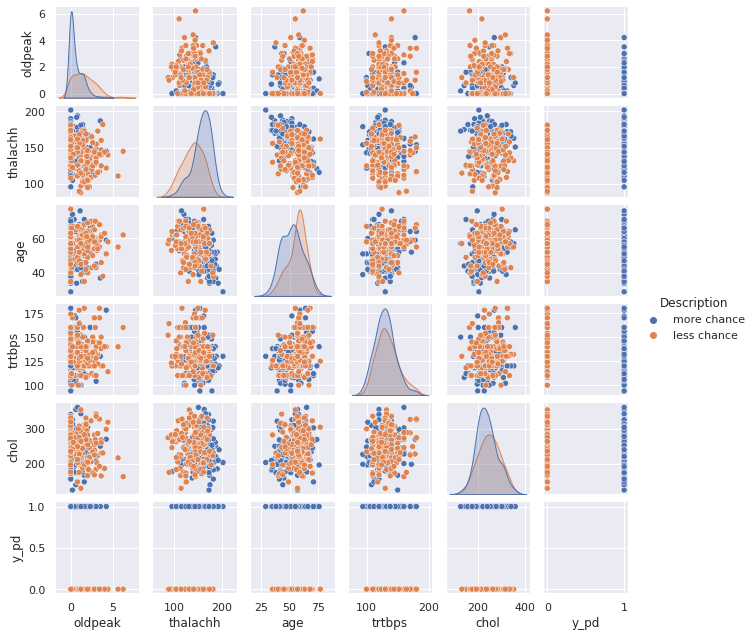

In [69]:
X_pd_sns = pd.DataFrame(data=X_pd_all)
sns.pairplot(X_pd_sns, height=1.5,hue='Description');

In [70]:
X_pd_all=X_pd_all.values
y_pd=y_pd.values

In [71]:
x_train,x_test,y_train,y_test = train_test_split(X_pd_all,y_pd,test_size=0.25,random_state=42)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((221, 7), (221,), (74, 7), (74,))

## 5.1 2D visualization

In [72]:
ind = 1
cols[:ind+1]

['oldpeak', 'thalachh']

In [73]:
x_train_2d = x_train[:, :ind+1]
x_train_2d = x_train_2d.reshape(-1,ind+1)
x_test_2d =x_test[:, :ind+1]
x_test_2d = x_test_2d.reshape(-1,ind+1)

We use the LogisticRegression as the classifier in this 2D visualization.

In [74]:
from sklearn.linear_model import LogisticRegression
clf_2d_logistic = LogisticRegression(class_weight='balanced')
clf_2d_logistic.fit(x_train_2d, y_train)

LogisticRegression(class_weight='balanced')

In [75]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = clf_2d_logistic.predict(x_train_2d)
conf_matrix = confusion_matrix(y_train, y_train_pred)
TN, FP, FN, TP = conf_matrix[0,0], conf_matrix[0,1], conf_matrix[1,0], conf_matrix[1,1]
precision_logistic = TP / (TP + FP)
recall_logistic = TP / (TP + FN)
print("precision_logistic = {0:.6f}".format(precision_logistic))

precision_logistic = 0.750000


In [76]:
from sklearn.metrics import precision_score, recall_score
y_test_2d_logistic_pred_sol = clf_2d_logistic.predict(x_test_2d)
precision_logistic_sol = precision_score(y_test, y_test_2d_logistic_pred_sol)
recall_logistic_sol = recall_score(y_test, y_test_2d_logistic_pred_sol)
print("recall_logistic = {0:.6f}".format(recall_logistic))

recall_logistic = 0.768595


In [77]:
xlim = (-1,7)  # oldpeak
ylim = (80, 210) # thalachh
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                     np.linspace(ylim[0], ylim[1], 100))

(-1.0, 7.0, 80.0, 210.0)

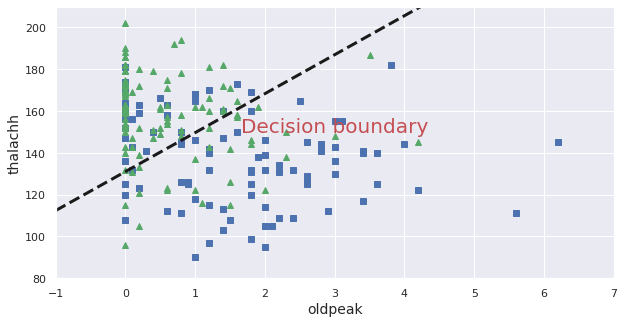

In [78]:
X_new = np.c_[xx.ravel(), yy.ravel()]
y_proba = clf_2d_logistic.predict_proba(X_new)

plt.figure(figsize=(10, 5))
plt.plot(x_train_2d[y_train==0, 0], x_train_2d[y_train==0, 1], "bs")
plt.plot(x_train_2d[y_train==1, 0], x_train_2d[y_train==1, 1], "g^")

left_right = np.array([-1,7]) 
boundary = -(clf_2d_logistic.coef_[0][0] * left_right + clf_2d_logistic.intercept_[0]) / clf_2d_logistic.coef_[0][1]

plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3, 150, "Decision boundary", fontsize=20, color="r", ha="center")
plt.xlabel("oldpeak", fontsize=14)
plt.ylabel("thalachh", fontsize=14)
plt.axis([-1,7,80, 210])

In this first output of 2D visualization, we can find the line of decision boundary which is not suitable for such an instance. The individuals can not be split correctly by this linear function of the decision boundary, so I apply the Support Vector Machine to train the data and I use the polynomial line of decision boundary to classify the individuals.

In [79]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
gamma=20
c = 1
C = 1e10
hyperparams=gamma,C
polynomial_svm_clf= Pipeline((
        ("scaler", StandardScaler()),
        ("svm_clf",SVC(kernel='rbf',gamma=gamma,C=c))
    ))
polynomial_svm_clf.fit(x_train_2d, y_train)
svm_clfs=[]
svm_clfs.append(polynomial_svm_clf)

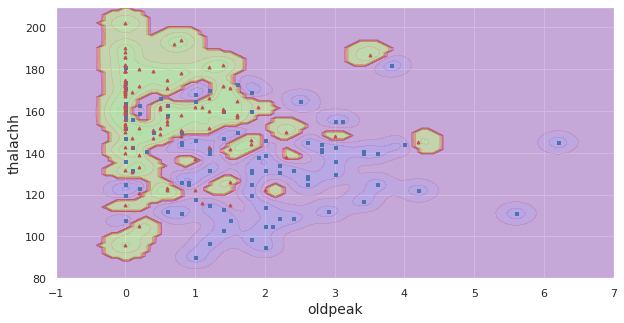

In [80]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs",markersize=3)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "r^",markersize=3)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel("oldpeak", fontsize=14)
    plt.ylabel("thalachh", fontsize=14)
def plot_predictions(clf, axes):
    xlim = (-1,7)  # oldpeak
    ylim = (80, 210) # thalachh
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    X_new = np.c_[xx.ravel(), yy.ravel()]
    y_pred = clf.predict(X_new).reshape(xx.shape)
    y_decision = clf.decision_function(X_new).reshape(xx.shape)
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(xx, yy, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.figure(figsize=(10,5))
plot_predictions(polynomial_svm_clf, [-1,7,80, 210])
plot_dataset(x_train_2d, y_train, [-1,7,80, 210])

The better output of 2D visualization showing the result of classification. We can observe that the individuals with higher Maximum heart rate achieved and 0 of the previous peak have the more chance of heart attack (The red triangles represent the classification of "more chance of heart attack as an indicator of '1'").

## 5.2 3D visualization

We can also import the data into 3D dimension. On the 3D space, one more variable can be considered as the parameter to classify the individuals.

I pick the top 3 variables with high correlation score in the correlation matrix, which are 'oldpeak', 'thalachh' and 'age'.

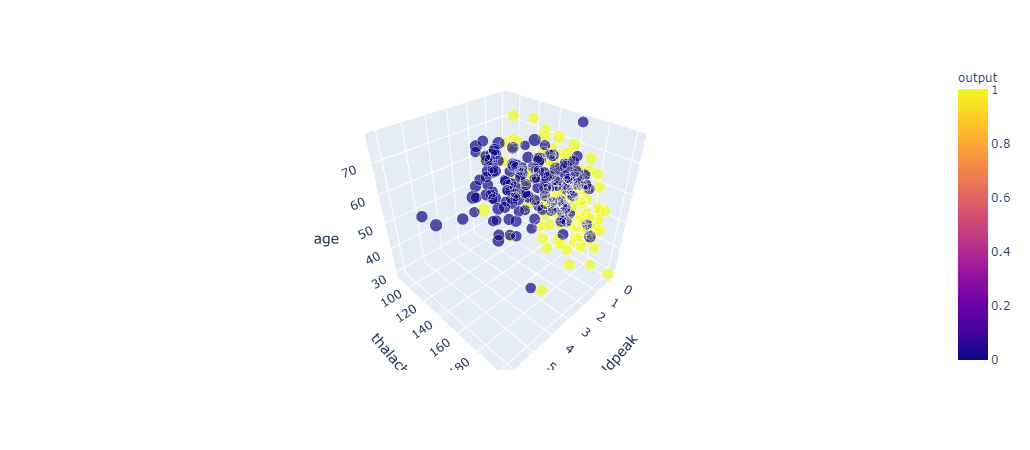

In [81]:
import plotly.express as px
fig = px.scatter_3d(df, x='oldpeak', y='thalachh', z='age',
              color='output',size='trtbps',color_discrete_sequence=['#f64c72','#85bfdc'])
fig.show()

We can focus on samples of "more chance of heart attack" which are represented as yellow balls. The yellow balls locating the area with a higher maximum heart rate, 0 of the oldpeak and younger generation.

# 6. Conclusion

Heart disease is the leading cause of death worldwide, and prevention is a major public health priority. However, the treatment of heart disease has improved sharply over the years (). Back to the result of this paper, one surprising thing is the younger will have more chance of having a heart attack. The website of Mayo Clinic Staff announces that sudden death in younger people the age under 35, usually occurs during physical activity, for example playing a sport (Mayo Clinic, 2019). And this report is consistent with my findings. Of cause, not all individuals who have heart attacks have the same symptoms (Mayo Clinic, 2020), we should pay more attention to our physical status, such as often going to the hospital to check our body in case having any illness.

# Reference List

American Heart Association (2016) Warning Signs of a Heart Attack | American Heart Association. July 2016 [online] American Heart Association. Available at: <https://www.heart.org/en/health-topics/heart-attack/warning-signs-of-a-heart-attack> [Accessed: 25 April 2021].

Mayo Clinic (2019) Sudden death in young people: Heart problems often blamed. January 2019. [online] Mayo Clinic. Available at: <https://www.mayoclinic.org/diseases-conditions/sudden-cardiac-arrest/in-depth/sudden-death/art-20047571> [Accessed: 25 April 2021].

Mayo Clinic (2020) Heart attack - Symptoms and causes. June 2020 [online] Mayo Clinic. Available at: <https://www.mayoclinic.org/diseases-conditions/heart-attack/symptoms-causes/syc-20373106> [Accessed: 25 April 2021].

World Health Organization (2020)The top 10 causes of death. December 2020. [online] World Health Organization. Available at: <https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death> [Accessed: 25 April 2021].
